<a href="https://colab.research.google.com/github/RuthNduta/Detecting_Fake_Bank_Notes/blob/main/Classification_of_Bank_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
#Reading the data
bank_note_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


#Data Description

* VWTI: Variance of Wavelet Transformed Image
* SWTI: Skewness of Wavelet Transformed Image
* CWTI: Curtosis of Wavelet Transformed Image
* EI: Entropy of Image
* Class: Class (1: genuine, 0: forged)

Our dataset is clean so we'll dive straight into modelling

#Separating Input and Target Variable

In [ ]:
X = bank_note_data.drop('Class', axis=1)#Input variables
y = bank_note_data['Class']#Target variables
print(X.shape)
print(y.shape)

(1096, 4)
(1096,)


#Splitting into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
n_features = X.shape[1]
print(n_features)

#Normalizing the input variables
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

(876, 4)
4


#Model Building

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. 

* We are to come up with an efficient model that accurately predicts if a note is genuine or not.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

##Define model


We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features.

Since this is a binary classification problem, we will use a sigmoid activation function in the final layer of our network.

Sigmoid is commonly used in the output layer. This is because it helps in giving a probability(value between 0 and 1) which is useful in Binary Classification.

Our model architecture
For our model, we'll be considering the following:

Input = the no. of features in X_train = 4

* No. of neurons/units in second Dense layer = 16
* No. of neurons/units in third Dense layer = 8
* No. of neurons/units in output layer = 1

If you closely look at it, we're slowly decreasing the number of neurons in each layer. Deciding the no. of hidden layers and no. of neurons is a process of trial and error.

In [ ]:
model =Sequential()
model.add(Dense(16, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

The above code creates a Neural Network that has 3 layers.

* The last node uses the sigmoid activation function that will squeeze all the values between 0 and 1.

* The other layers use ReLU (Rectified Linear Units) as the activation function. 

* One output unit is used since for each record values in X, a probability will be predicted. If it is low, then bank note is forged. If it is high, then the bank note is real/not fake.

#Compile Model

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Let's see the model's summary:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


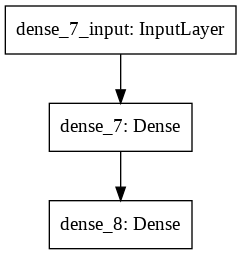

In [ ]:
#Let's visualize the model
from tensorflow.keras.utils import plot_model

plot_model(model)

#History
We'll be saving the trained model to a variable history.

When running a model, Tensorflow Keras maintains a so-called History object in the background. This object keeps all loss values and other metric values in memory so that they can be used for visualizations.

The history object is the output of the fit operation.

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 20, batch_size=10, verbose=1)

Epoch 1/20
70/70 [==============================] - 1s 4ms/step - loss: 1.1146 - accuracy: 0.4421 - val_loss: 0.7608 - val_accuracy: 0.4432
Epoch 2/20
70/70 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6028 - val_loss: 0.4353 - val_accuracy: 0.8295
Epoch 3/20
70/70 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.9081 - val_loss: 0.2509 - val_accuracy: 0.9830
Epoch 4/20
70/70 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9895 - val_loss: 0.1554 - val_accuracy: 0.9830
Epoch 5/20
70/70 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9878 - val_loss: 0.1061 - val_accuracy: 0.9886
Epoch 6/20
70/70 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9895 - val_loss: 0.0746 - val_accuracy: 0.9830
Epoch 7/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9939 - val_loss: 0.0568 - val_accuracy: 0.9943
Epoch 8/20
70/70 [==

## Model Evaluation
Evaluating the model requires that you first choose a separate dataset used to evaluate the model. This should be data not used in the training process i.e. the X_test.

Now, let us use the trained model to predict the probability values for the new data set - The test set we had initially created. The below code passes the X_test and y_test to the trained model and gives out the probability.

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000


[0.004843404050916433, 1.0]

### Model Accuracy
Now, we'll use the history object created above to plot the Accuracy and Loss throughout the training process.

You can think of history.history as a Python dictionary from which the values can be obtained by specifying a key within square brackets.

For eg. `history.history['accuracy']` will give the train accuracy throughout the training process.

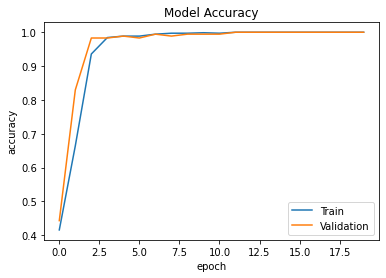

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Model Loss

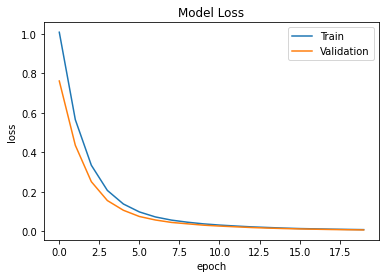

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Observe how the accuracy is slowly increasing and the loss slowly decreasing. Interesting, right?


#Hyperparameter Tuning



Now we will go through the process of automating hyperparameter tuning using **Random Search** and **Keras**. Random Search is a hyperparameter search procedure that is performed on a defined grid of hyperparameters. However, not all hyperparameter combinations are used to train a new model, only some selected randomly, while a process of cross-validation to measure the performance of temporal models. Once the process is complete, the hyperparameters and the best performing model are chosen.


We'll use the `keras-tuner`, a library that helps you pick the optimal set of hyperparameters for your TensorFlow model.

### Goal: tune the learning rate

In [ ]:
# 0. Install and import all the packages needed
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 2.7MB/s 


In [ ]:
# 1. Define the general architecture of the model through a creation user-defined function
def model_builder(hp):
  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(n_features,)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4]) # Tuning the learning rate (four different values to test: 0.1, 0.01, 0.001, 0.0001)
  optimizer = RMSprop(learning_rate = hp_learning_rate)                            # Defining the optimizer
  model.compile(loss='mse',metrics=['mse'], optimizer=optimizer)                   # Compiling the model 
  return model                                                                     # Returning the defined model

In [ ]:
#Let's define the model
def tuned_model(hpm):
  model =Sequential()
  model.add(Dense(16, activation='relu', input_shape=(n_features,)))
  model.add(Dense(1, activation='sigmoid'))
  hpm_learning_rate = hpm.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4]) # Tuning the learning rate (four different values to test: 0.1, 0.01, 0.001, 0.0001)
  optimizer = RMSprop(learning_rate=hpm_learning_rate)
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

In [ ]:
#Define the hyperparameters grid to be validated
tuner_rs = kt.RandomSearch(
              tuned_model,                # Takes hyperparameters (hp) and returns a Model instance
              objective = 'loss',            # Name of model metric to minimize or maximize
              seed = 42,                    # Random seed for replication purposes
              max_trials = 5,               # Total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before max_trial models have been tested.
              directory='random_search')    # Path to the working directory (relative).


tuned = tuner_rs.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Trial 4 Complete [00h 00m 01s]
loss: 0.17289167642593384

Best loss So Far: 0.07457069307565689
Total elapsed time: 00h 00m 07s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# 4.1. Print the summary results of the hyperparameter tuning procedure
tuner_rs.results_summary()

Results summary
Results in random_search/untitled_project
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
learning_rate: 0.1
Score: 4.1804181819316e-05
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.0013877165038138628
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.14793594181537628
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.2481890618801117


In [ ]:
# 4.2. Print the results of the best model
best_model = tuner_rs.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.3681e-06 - accuracy: 1.0000


[1.2480370969569776e-05, 1.0]

In [ ]:
# 4.3. Print the best model's architecture
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ----------------------------- Functional Tuning - Option 1: using Sklearn  ------------------------------
# Goal: tune the batch size and epochs

# Import KerasRegressor class
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
# Define the model trhough a user-defined function
def create_model(optimizer=RMSprop(0.01)):
  model = Sequential()
  model.add(Dense(16, activation='relu', input_shape=(n_features,)))
  model.add(Dense(1))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)    # compile the model
  return model
model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters grid to be validated
batch_size = [10, 20, 30, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
model = KerasRegressor(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train, verbose = 1)

# Print the results of the best model
print('Best params: ' + str(grid_result.best_params_))

In [19]:
from keras.wrappers.scikit_learn import KerasRegressor
def create_model(optimizer = RMSprop(0.01)):
  model=Sequential()
  model.add(Dense(16, activation='relu', input_shape=(n_features,)))
  model.add(Dense(1))
  model.compile(loss='binary_crossentropy',metrics=['binary_crossentropy'], optimizer=optimizer)
  return model
model= KerasRegressor(build_fn=create_model, verbose=1)
model

In [ ]:
#Hyperparameters to be tuned
batch_size =[10,20,30,40,50,60,80, 100]
epochs = [10,50,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, n_jobs=-1)
result = grid.fit(X_train,y_train, verbose=1)
print('Bestie:' + str(result.best_params_))

In [ ]:
# Import the cross validation evaluator
from sklearn.model_selection import cross_val_score

# Measure the model's performance
results = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print('Results: \n  * Mean:', -results.mean(), '\n  * Std:', results.std())

# Conclusion
I developed a working Neural Network for the binary classification problem and was able to classify the fake and real bank notes.